### Training and Testing

In [1]:
import numpy as np
import os
import constants as cs
import yaml
import globali as gg
import settings
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint, CSVLogger
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import custom_data_generator as cdg 

### Load configuration data

In [3]:
# Load actions and counters
gg.actions, gg.counters = settings.read_yaml_fields()
label_map = {label:num for num, label in enumerate(gg.actions)}
display(gg.actions)
display(gg.counters)

### Read keypoints and split train and test set

In [5]:
sequences, labels = [], []

# get all the keypoints
for action in tqdm(gg.actions, desc="Processing Actions"):
    for sequence in range(gg.counters[action]):
        window = []
        for frame_num in range(cs.NUM_FRAME):
            res = np.load(os.path.join(cs.KEYPOINTS_FOLDER, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

display(np.array(sequences).shape)   
display(np.array(labels).shape)

Processing Actions: 100%|██████████| 58/58 [01:31<00:00,  1.57s/it]


In [7]:
# generate X and y
X = np.array(sequences)
y = to_categorical(labels).astype(int)

display(X.shape)
display(y.shape)

(4921, 30, 1662)

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [8]:
# split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4674, 58)
(247, 58)


### Folders

In [9]:
def create_folder_for_training(number):
    # create folders
    log_f = os.path.join(cs.LOGS_FOLDER, 'log_' + str(number), '')
    model_f = os.path.join(cs.MODELS_FOLDER, 'model_' + str(number))
    os.makedirs(log_f, exist_ok=True)
    os.makedirs(model_f, exist_ok=True)
    log_f = "D:\logs"
    return log_f, model_f

In [10]:
os.getcwd()

'D:\\Università\\Magistrale_Roma_Tre\\Deep_Learning\\Progetto\\PROGETTO\\AslDetenction'

In [11]:
log_f, model_f = create_folder_for_training(22)

### Logs

In [12]:
# log
tensorboard_callback = TensorBoard(log_dir=log_f, histogram_freq=1)
training_log = os.path.join(log_f, 'train_log.csv')
csv_logger = CSVLogger(training_log, append=True)

### Models

In [12]:
# LSTM (model_1)

np_actions = np.array(list(gg.actions))
print(np_actions.shape[0])
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(np_actions.shape[0], activation='softmax'))


58


In [13]:
# LSTM (model_21_22)
np_actions = np.array(list(gg.actions))
print(np_actions.shape[0])
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(np_actions.shape[0], activation='softmax'))

58


In [12]:
# GRU (model_2)

np_actions = np.array(list(gg.actions))
print(np_actions.shape[0])
model = Sequential()
model.add(GRU(64, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(Dropout(0.2))
model.add(GRU(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=False, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(np_actions.shape[0], activation='softmax'))


58


In [7]:
# GRU (model_3)

np_actions = np.array(list(gg.actions))
model = Sequential()
model.add(GRU(64, return_sequences=True, activation='tanh', input_shape=(30, 1662)))
model.add(GRU(128, return_sequences=True, activation='tanh'))
model.add(GRU(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(np_actions.shape[0], activation='softmax'))

In [14]:
# Old LSTM

np_actions = np.array(list(gg.actions))
print(np_actions.shape[0])
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(np_actions.shape[0], activation='softmax'))

58


### Training

In [14]:
# Creazione del generatore personalizzato
batch_size = 32
train_generator = cdg.CustomDataGenerator(X_train, y_train, batch_size=batch_size, augment_data=True)

In [15]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
early_stopping = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
best_model_path = os.path.join(model_f, 'best_model.h5') 
checkpoint = ModelCheckpoint(best_model_path, monitor='loss', save_best_only=True)
history = model.fit(train_generator, epochs=400, callbacks=[early_stopping,
                                                              checkpoint,
                                                              csv_logger,
                                                              tensorboard_callback])        # X_train, y_train,
# save best model
final_model_path = os.path.join(model_f, 'final_model.h5')
model.save(final_model_path)


Epoch 1/400
147/147 [==============================] - ETA: 0s - loss: 4.5293 - categorical_accuracy: 0.0212

C:\Users\Paolo\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


147/147 [==============================] - 31s 118ms/step - loss: 4.5293 - categorical_accuracy: 0.0212
Epoch 2/400
147/147 [==============================] - 16s 105ms/step - loss: 4.0598 - categorical_accuracy: 0.0182
Epoch 3/400
147/147 [==============================] - 14s 93ms/step - loss: 3.8424 - categorical_accuracy: 0.0374
Epoch 4/400
147/147 [==============================] - 15s 101ms/step - loss: 3.6840 - categorical_accuracy: 0.0383
Epoch 5/400
147/147 [==============================] - 17s 114ms/step - loss: 3.6197 - categorical_accuracy: 0.0580
Epoch 6/400
147/147 [==============================] - 16s 110ms/step - loss: 3.4806 - categorical_accuracy: 0.0719
Epoch 7/400
147/147 [==============================] - 16s 111ms/step - loss: 3.3817 - categorical_accuracy: 0.0858
Epoch 8/400
147/147 [==============================] - 16s 109ms/step - loss: 3.3311 - categorical_accuracy: 0.0899
Epoch 9/400
147/147 [==============================] - 16s 109ms/step - loss: 3.3513 

KeyboardInterrupt: 

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 58)                1914      
                                                                 
Total params: 598490 (2.28 MB)
Trainable params: 598490 

In [31]:
# Load the weights pf trained model
model.load_weights('models/model_21/best_model.h5')

### Make Predictions

In [32]:
res = model.predict(X_test)

8/8 [==============================] - 0s 35ms/step


In [33]:
np_actions[np.argmax(res[7])]

'deaf'

In [34]:
np_actions[np.argmax(y_test[7])]

'deaf'

In [35]:
# model.load_weights('action.h5')

### Evaluation using Confusion Matrix and Accuracy

In [36]:
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 47ms/step


In [37]:
y_true = np.argmax(y_test, axis=1).tolist()
y_pred = np.argmax(y_pred, axis=1).tolist()

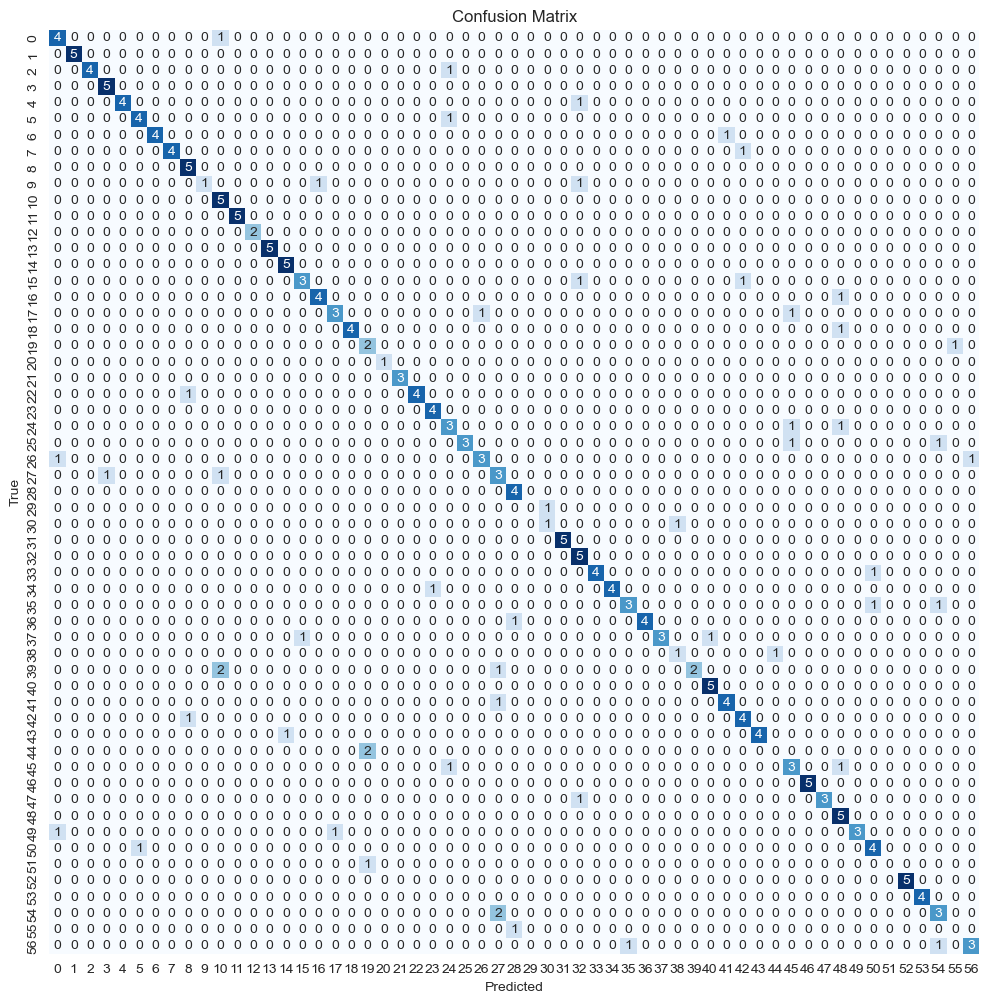

In [38]:
# calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# show confusion matrix
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# save confusion matrix into file JPG
plt.savefig(model_f + '/confusion_matrix.jpg', format='jpg')
plt.show()
plt.close()

In [39]:
accuracy_score(y_true, y_pred)

0.7813765182186235